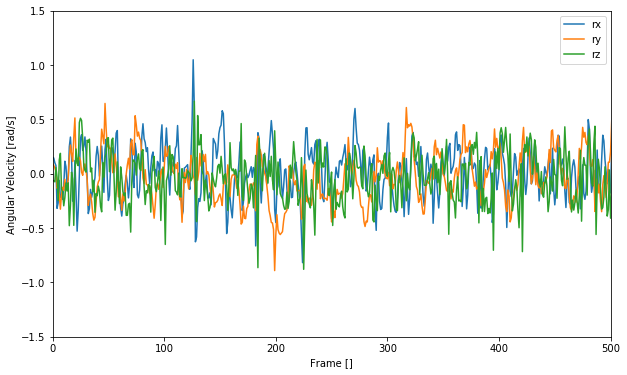

In [2]:
# CSVファイルから時系列データを読み込み、Matplotlibでグラフにデータを表示する。

from cProfile import label
import csv
import matplotlib.pyplot as plt

with open('../build/latest_estimated_angular_velocity.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # ヘッダー行を読み飛ばし

    data = []
    for row in reader:
        data.append(row)

legends = [i for i in header]
data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換
# data = [print(row) for row in data]  # 文字列を数値に変換
# X軸に時間を、Y軸にデータをセット
t = [row[legends.index('Frame')] for row in data]
rx = [row[legends.index('rx')] for row in data]
ry = [row[legends.index('ry')] for row in data]
rz = [row[legends.index('rz')] for row in data]

plt.figure(figsize=(10,6))

plt.plot(t, rx, label='rx')
plt.plot(t, ry, label='ry')
plt.plot(t, rz, label='rz')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Angular Velocity [rad/s]')
plt.ylim(-1.5,1.5)
plt.xlim(0,500)
plt.show()

In [3]:
import csv
import pprint

with open('../build/latest_filter_coefficients.csv') as f:
    # print(f.read())
    reader = csv.reader(f)
    l = [row for row in reader]

In [4]:
l

[['Filter coefficients', 'Frame'],
 ['96.000000', '0.000000'],
 ['96.500000', '1.000000'],
 ['97.000000', '2.000000'],
 ['97.500000', '3.000000'],
 ['98.000000', '4.000000'],
 ['98.500000', '5.000000'],
 ['99.000000', '6.000000'],
 ['99.500000', '7.000000'],
 ['100.000000', '8.000000'],
 ['100.500000', '9.000000'],
 ['101.000000', '10.000000'],
 ['101.500000', '11.000000'],
 ['102.000000', '12.000000'],
 ['102.500000', '13.000000'],
 ['103.000000', '14.000000'],
 ['103.500000', '15.000000'],
 ['104.000000', '16.000000'],
 ['104.500000', '17.000000'],
 ['105.000000', '18.000000'],
 ['105.000000', '19.000000'],
 ['104.500000', '20.000000'],
 ['104.000000', '21.000000'],
 ['103.500000', '22.000000'],
 ['103.000000', '23.000000'],
 ['102.500000', '24.000000'],
 ['102.000000', '25.000000'],
 ['101.500000', '26.000000'],
 ['101.000000', '27.000000'],
 ['101.500000', '28.000000'],
 ['102.000000', '29.000000'],
 ['102.500000', '30.000000'],
 ['103.000000', '31.000000'],
 ['103.500000', '32.000

In [5]:
l[0].index('Frame')

1

In [9]:
[float(r[l[0].index('Frame')]) for r in l[1:]] # Extract frame

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [10]:
[float(r[l[0].index('Filter coefficients')]) for r in l[1:]] # Extract Filter coefficients

[96.0,
 96.5,
 97.0,
 97.5,
 98.0,
 98.5,
 99.0,
 99.5,
 100.0,
 100.5,
 101.0,
 101.5,
 102.0,
 102.5,
 103.0,
 103.5,
 104.0,
 104.5,
 105.0,
 105.0,
 104.5,
 104.0,
 103.5,
 103.0,
 102.5,
 102.0,
 101.5,
 101.0,
 101.5,
 102.0,
 102.5,
 103.0,
 103.5,
 104.0,
 104.5,
 105.0,
 105.5,
 106.0,
 106.5,
 107.0,
 107.5,
 108.0,
 108.5,
 109.0,
 109.5,
 110.0,
 110.5,
 111.0,
 111.5,
 112.0,
 112.5,
 113.0,
 113.5,
 114.0,
 114.5,
 115.0,
 115.5,
 116.0,
 116.5,
 117.0,
 117.5,
 118.0,
 118.5,
 119.0,
 119.5,
 120.0,
 120.5,
 121.0,
 121.5,
 122.0,
 122.5,
 123.0,
 123.5,
 124.0,
 124.5,
 125.0,
 125.5,
 126.0,
 126.5,
 127.0,
 127.5,
 128.0,
 128.5,
 129.0,
 129.5,
 130.0,
 130.5,
 131.0,
 131.5,
 132.0,
 132.5,
 133.0,
 133.5,
 134.0,
 134.5,
 135.0,
 135.5,
 136.0,
 136.5,
 137.0,
 137.5,
 137.5,
 137.0,
 136.5,
 136.0,
 135.5,
 135.0,
 134.5,
 134.0,
 133.5,
 133.0,
 132.5,
 132.0,
 131.5,
 131.0,
 130.5,
 130.0,
 129.5,
 129.0,
 128.5,
 128.0,
 127.5,
 127.0,
 126.5,
 126.0,
 125.5,


<Figure size 432x288 with 0 Axes>

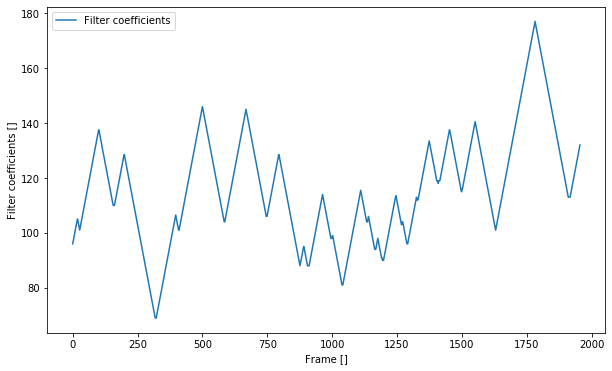

In [11]:
plt.clf()

frame = [float(r[l[0].index('Frame')]) for r in l[1:]] # Extract frame
coeff = [float(r[l[0].index('Filter coefficients')]) for r in l[1:]] # Extract Filter coefficients

plt.figure(figsize=(10,6))

plt.plot(frame, coeff, label='Filter coefficients')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Filter coefficients []')
# plt.ylim(-1.5,1.5)
# plt.xlim(0,500)
plt.show()